<a href="https://colab.research.google.com/github/phenixua/HW_11/blob/main/WH_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from tensorflow.keras.preprocessing import sequence

# Завантаження даних
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Підготовка даних
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Побудова та навчання моделі RNN
model_rnn = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training RNN...')
history_rnn = model_rnn.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Побудова та навчання моделі LSTM
model_lstm = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training LSTM...')
history_lstm = model_lstm.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Побудова та навчання моделі Bidirectional LSTM
model_bidirectional_lstm = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_bidirectional_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training Bidirectional LSTM...')
history_bidirectional_lstm = model_bidirectional_lstm.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Побудова та навчання глибокої моделі LSTM
model_deep_lstm = Sequential([
    Embedding(max_features, 32),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_deep_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print('Training Deep LSTM...')
history_deep_lstm = model_deep_lstm.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Training RNN...
Epoch 1/10
625/625 [==============================] - 275s 434ms/step - loss: 0.6196 - accuracy: 0.6488 - val_loss: 0.5049 - val_accuracy: 0.7622
Epoch 2/10
625/625 [==============================] - 232s 371ms/step - loss: 0.4246 - accuracy: 0.8099 - val_loss: 0.5427 - val_accuracy: 0.7340
Epoch 3/10
625/625 [==============================] - 219s 351ms/step - loss: 0.2347 - accuracy: 0.9099 - val_loss: 0.5235 - val_accuracy: 0.7906
Epoch 4/10
625/625 [==============================] - 221s 354ms/step - loss: 0.0964 - accuracy: 0.9689 - val_loss: 0.6865 - val_accuracy: 0.7518
Epoch 5/10
625/625 [==============================] - 215s 344ms/step - loss: 0.0384 - accuracy: 0.9890 - val_loss: 0.7440 - val_accuracy: 0.7754
Epoch 6/10
625/625 [================

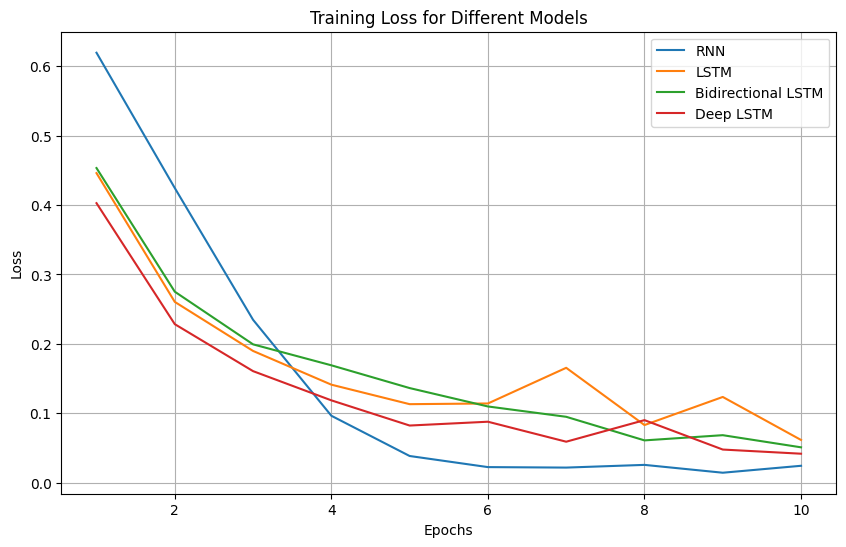

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Значення втрат та точності для кожної моделі
rnn_loss = [0.6196, 0.4246, 0.2347, 0.0964, 0.0384, 0.0224, 0.0217, 0.0256, 0.0143, 0.0243]
lstm_loss = [0.4461, 0.2605, 0.1898, 0.1412, 0.1131, 0.1141, 0.1655, 0.0830, 0.1235, 0.0615]
bidirectional_lstm_loss = [0.4534, 0.2752, 0.1993, 0.1691, 0.1363, 0.1098, 0.0949, 0.0609, 0.0684, 0.0509]
deep_lstm_loss = [0.4028, 0.2284, 0.1607, 0.1186, 0.0823, 0.0878, 0.0590, 0.0901, 0.0477, 0.0417]

# Епохи
epochs = np.arange(1, 11)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(epochs, rnn_loss, label='RNN')
plt.plot(epochs, lstm_loss, label='LSTM')
plt.plot(epochs, bidirectional_lstm_loss, label='Bidirectional LSTM')
plt.plot(epochs, deep_lstm_loss, label='Deep LSTM')
plt.title('Training Loss for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


На графіку ми бачимо зміну значень втрат під час навчання для чотирьох різних моделей: RNN, LSTM, Bidirectional LSTM та Deep LSTM.

RNN показав досить великі втрати під час перших кількох епох навчання, проте з часом втрати зменшуються і навіть стають меншими, ніж у LSTM та Bidirectional LSTM після 10 епох.

LSTM має менші втрати порівняно з RNN протягом всього процесу навчання. Він швидко досягає мінімальних втрат після декількох епох.

Bidirectional LSTM показав схожі результати з LSTM, але в нього були більші втрати на початку навчання.

Deep LSTM також має малі втрати, але трохи більші, ніж у звичайного LSTM, особливо на початку.

Загалом, LSTM виявився найефективнішим в даному випадку, оскільки він досягає найменших втрат швидше за інші моделі. Bidirectional LSTM та Deep LSTM також показали добрі результати, але вони мають тенденцію до більших втрат на початку навчання. RNN, хоча і може досягти невеликих втрат після багатьох епох, але він має тенденцію до більш великих втрат у порівнянні з іншими моделями.






